#**MSIN0097 Individual Assignment- Multivariate Classification Exploration**

### Word Count: N/A

##**Radar Signal Prediction**



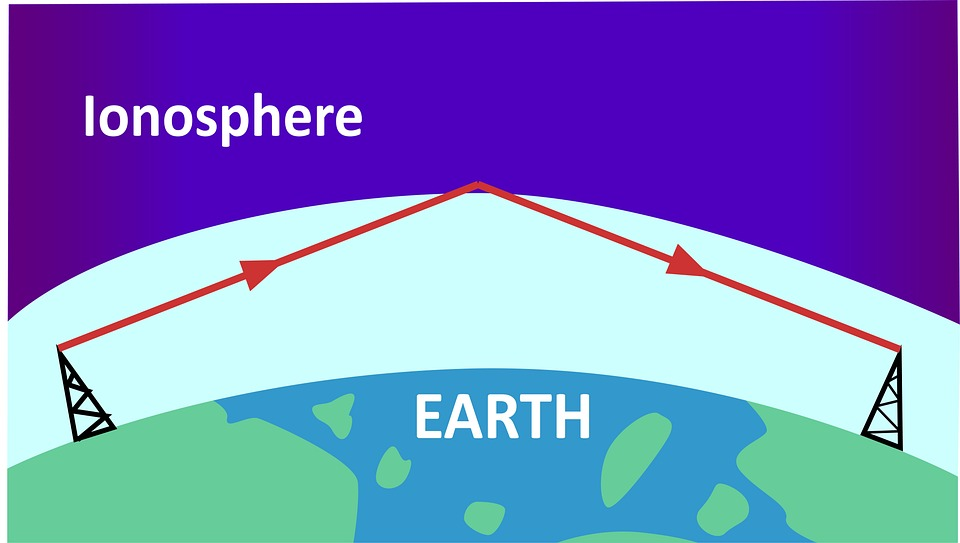

UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/52/ionosphere).
Data: 351 instances and 34 attributes.

Each instance is described by two attributes per pulse number
Objective: predict radar return signals based on free electrons in the ionosphere with multivariate classification methods.
Target variable: "Good" returns indicate structural evidence in the ionosphere; "Bad" returns do not show such evidence.

# Setups

In [3]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential,Model,Input
from tensorflow.keras.layers import Dense,Dropout
import keras_tuner as kt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA

# 设置随机种子保证可重复性
np.random.seed(25)
tf.random.set_seed(25)

import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis
2. Visualize and explain the main trends in the data 

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 

In [7]:
data = ionosphere.data.original

In [9]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   351 non-null    int64  
 1   Attribute2   351 non-null    int64  
 2   Attribute3   351 non-null    float64
 3   Attribute4   351 non-null    float64
 4   Attribute5   351 non-null    float64
 5   Attribute6   351 non-null    float64
 6   Attribute7   351 non-null    float64
 7   Attribute8   351 non-null    float64
 8   Attribute9   351 non-null    float64
 9   Attribute10  351 non-null    float64
 10  Attribute11  351 non-null    float64
 11  Attribute12  351 non-null    float64
 12  Attribute13  351 non-null    float64
 13  Attribute14  351 non-null    float64
 14  Attribute15  351 non-null    float64
 15  Attribute16  351 non-null    float64
 16  Attribute17  351 non-null    float64
 17  Attribute18  351 non-null    float64
 18  Attribute19  351 non-null    float64
 19  Attribut

In [17]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Attribute1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
Attribute2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
Attribute3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
Attribute4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
Attribute5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
Attribute6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
Attribute7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
Attribute8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
Attribute9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
Attribute10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


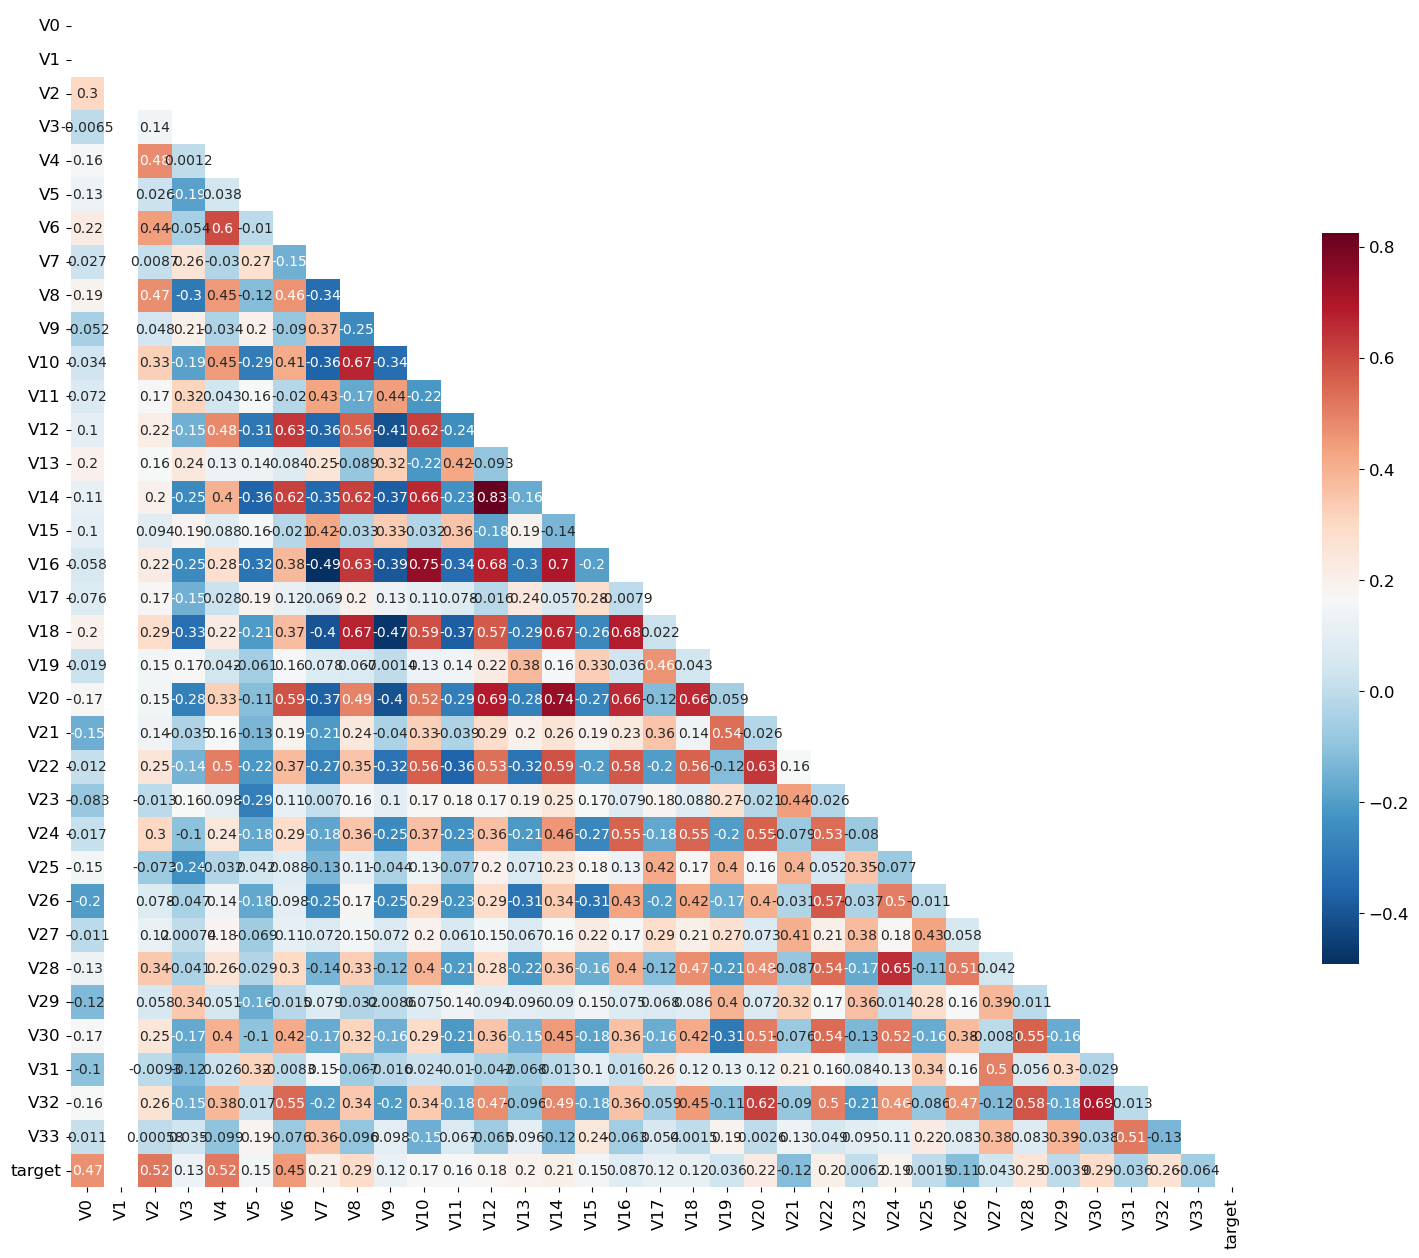

In [32]:
#create correlation matrix
corr = df.corr()

mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(19,19))
sns.heatmap(corr, mask=mask,square=True, annot=(True), cmap="RdBu_r",cbar_kws={'shrink':.5})

# Display the heatmap
plt.show()

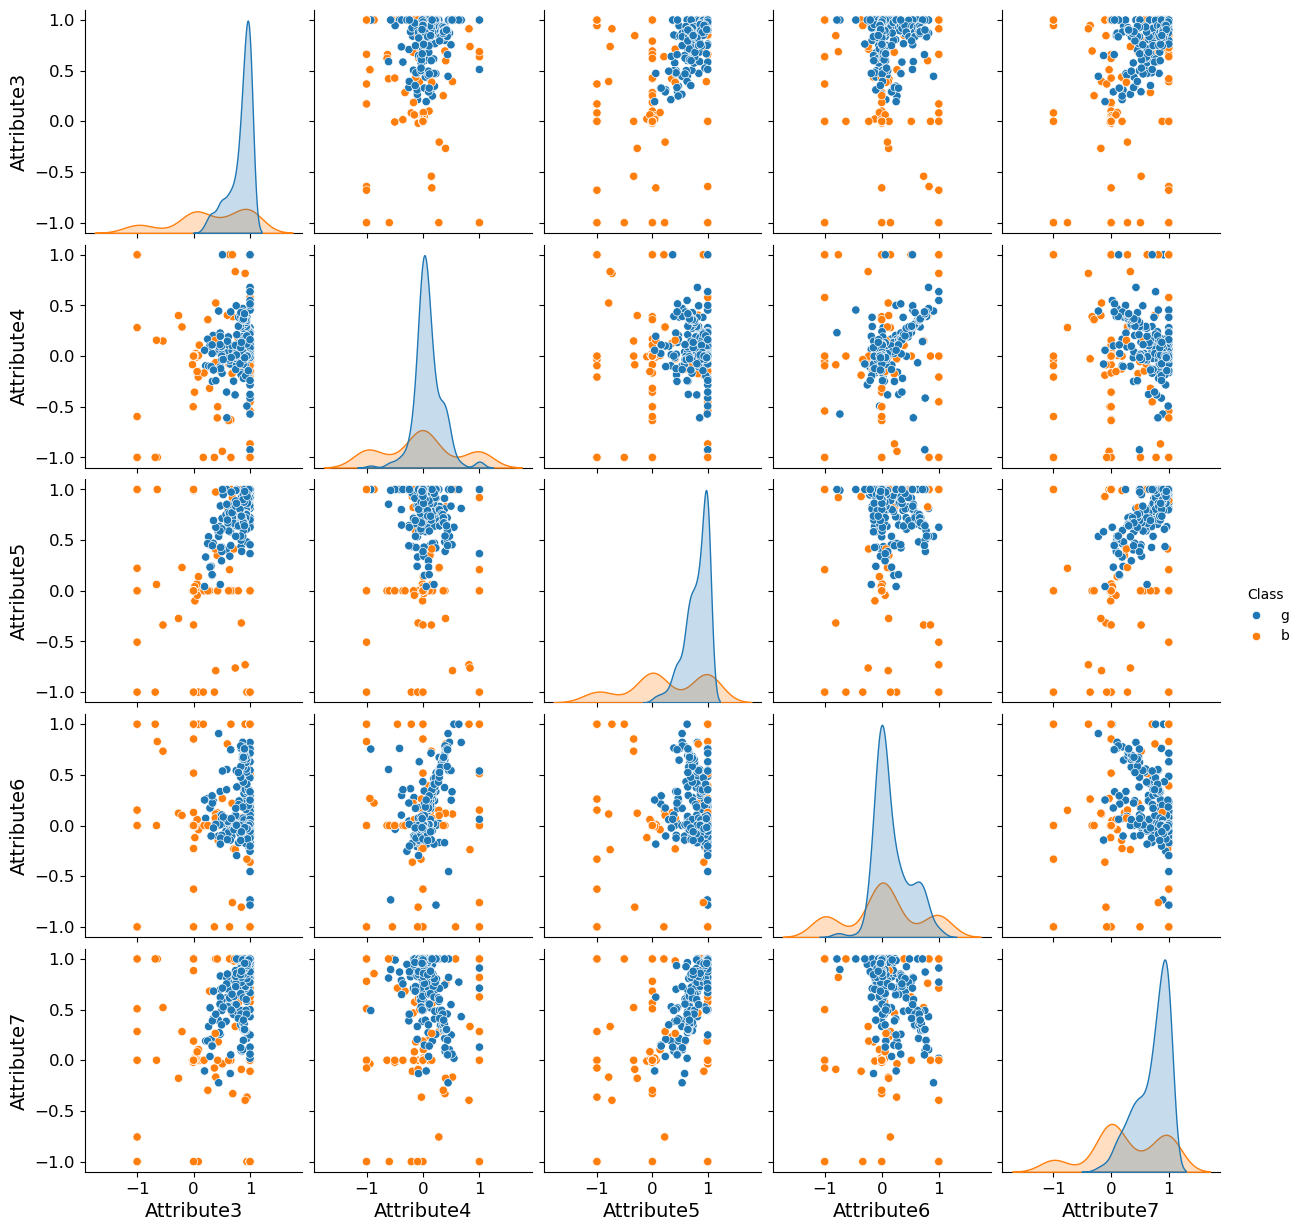

In [15]:
# Display the pairplot
sns.pairplot(data[['Attribute3','Attribute4','Attribute5','Attribute6','Attribute7','Class']],hue='Class') #,palette='RdYlGn'

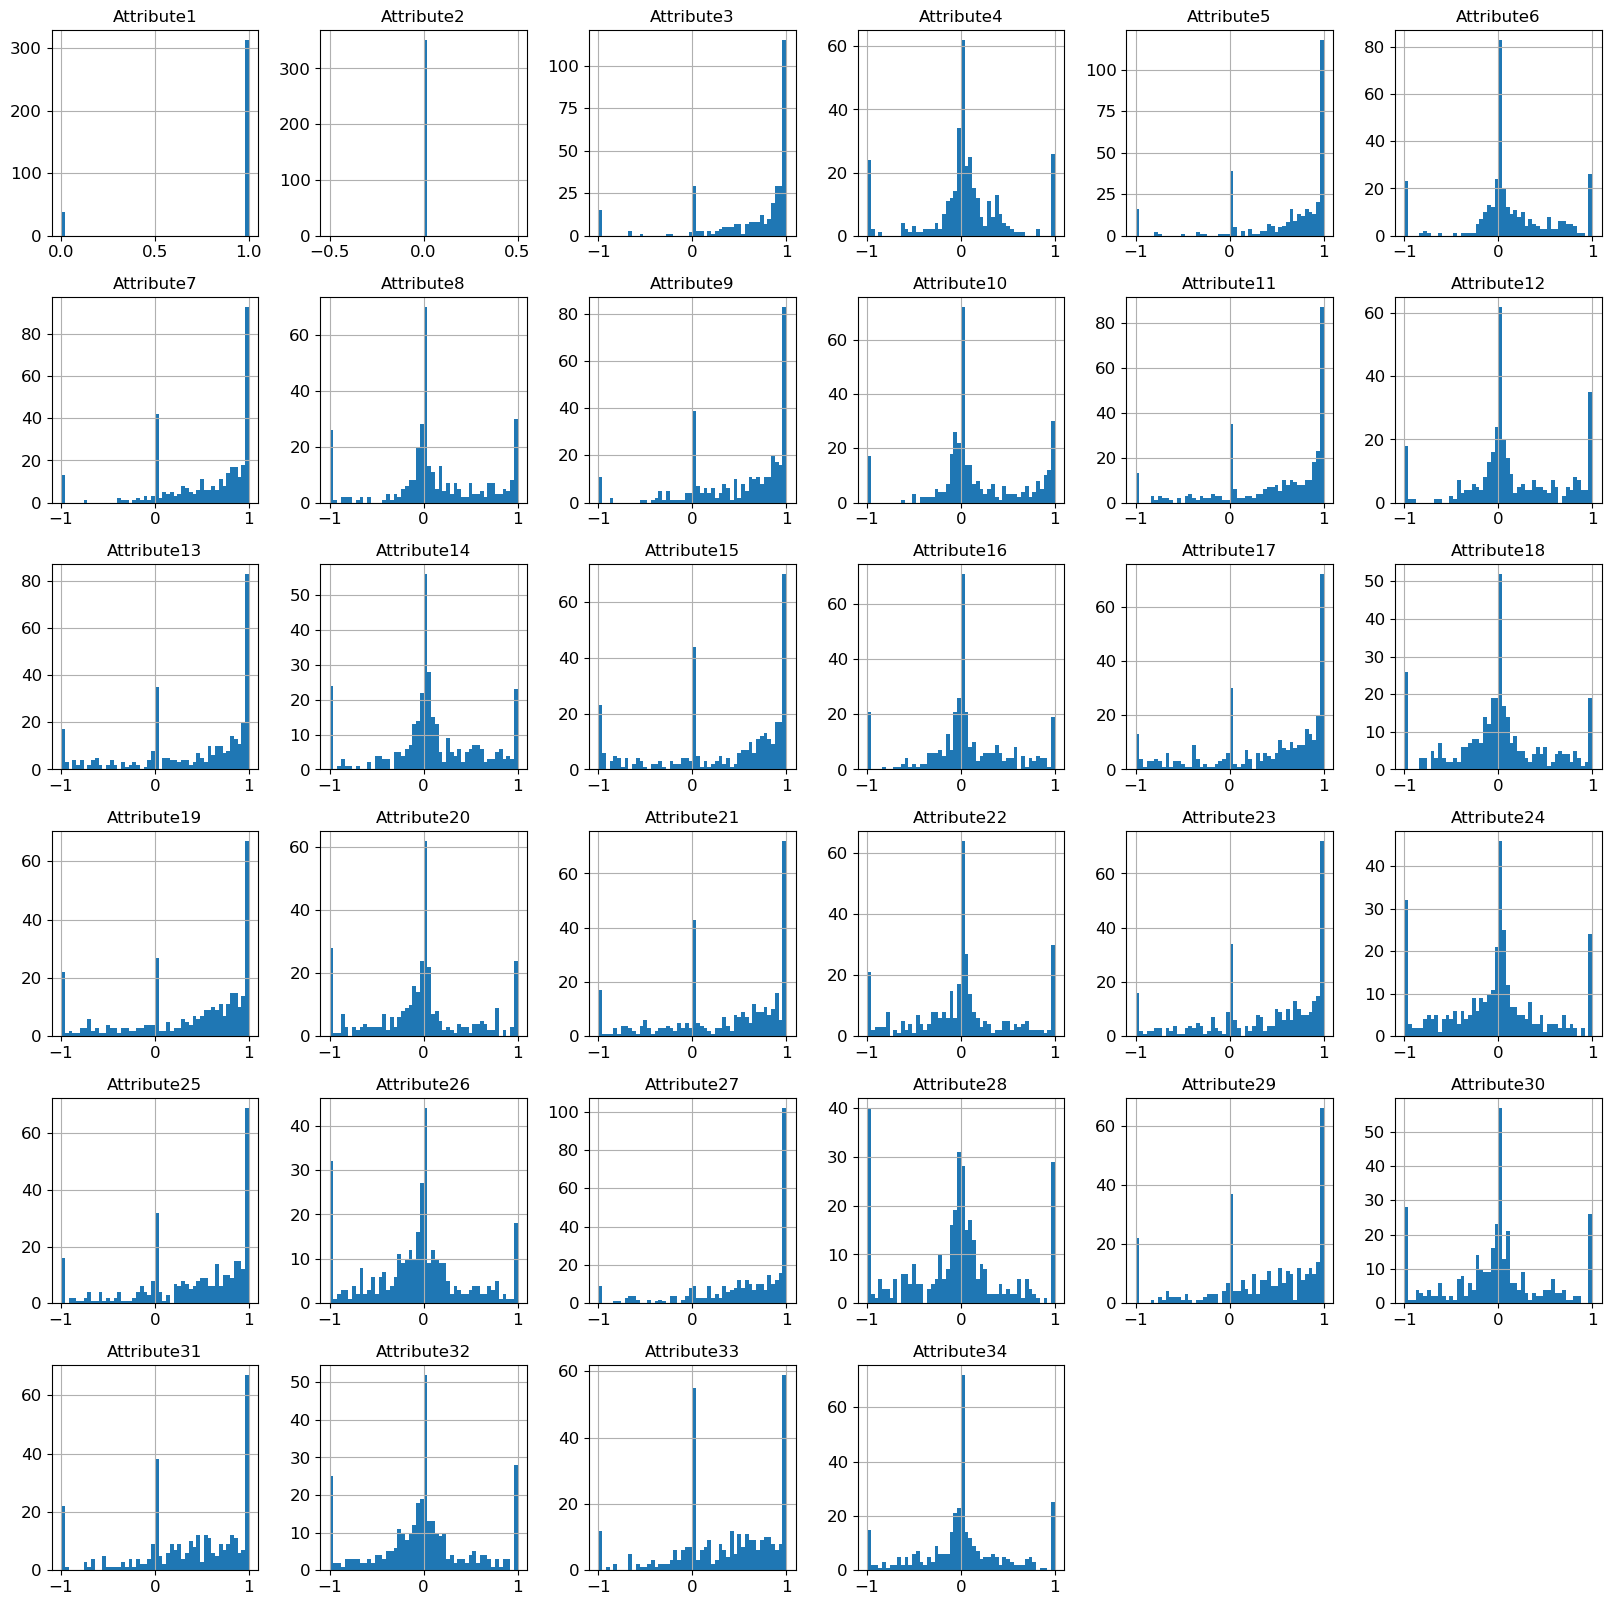

In [94]:
# distribution of the attributes data
X.hist(bins= 50, figsize=(20,20))
plt.show()

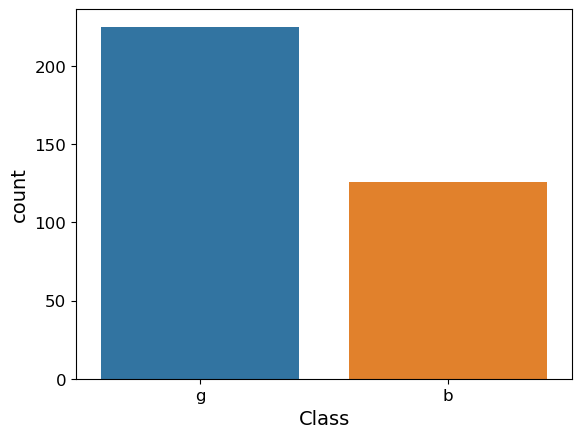

In [29]:
#Display target y distribution
sns.countplot(x='Class', data=data, hue='Class',legend=False)
plt.show()

imbalance dataset

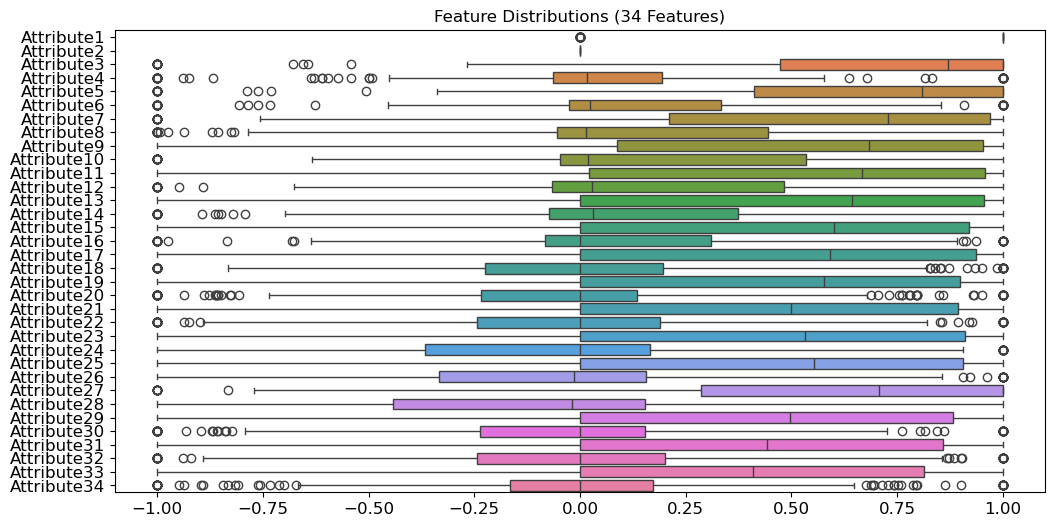

In [12]:
# Feature distributions
plt.figure(figsize=(12,6))
sns.boxplot(data=data.iloc[:,:], orient='h')
plt.title('Feature Distributions (34 Features)')
plt.show()

# Data preprocessing
3. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 

In [9]:
#unify all attributes data to floating values
X = X.astype('float32')

In [9]:
#drop useless feature
X.Attribute2.sum()

0.0

In [11]:
X.drop(columns=['Attribute2'], inplace=True)

In [13]:
#encode categorial label to numerical
y = LabelEncoder().fit_transform(y)

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=25)  #0.25

print(' Train Size:',X_train.shape, y_train.shape,'\n','Validation Size:',X_val.shape, y_val.shape,'\n','Test Size:',X_test.shape, y_test.shape)

 Train Size: (210, 33) (210,) 
 Validation Size: (70, 33) (70,) 
 Test Size: (71, 33) (71,)


In [17]:
# Scale the data
scaler = StandardScaler()
X_train_scaled,X_val_scaled,X_test_scaled = X_train.copy(),X_val.copy(),X_test.copy()
X_train_scaled.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])     #cat variable doesn't need scalling
X_val_scaled.iloc[:, 1:] = scaler.transform(X_val.iloc[:, 1:])
X_test_scaled.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

## Toying the dataset

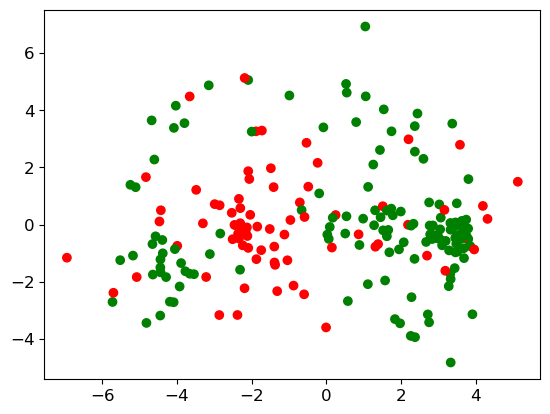

In [29]:
x_embedded = PCA(n_components=2).fit_transform(X_train_scaled)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

val acc: 0.8001207729468599


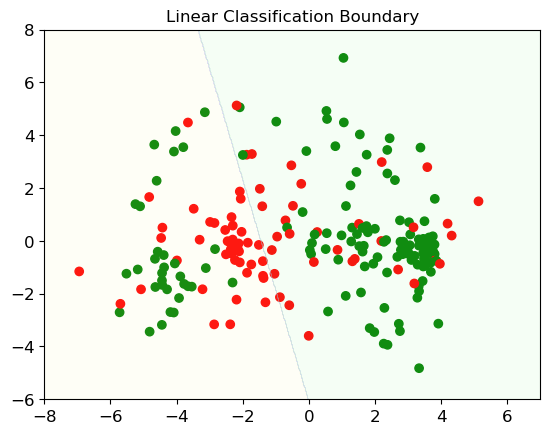

In [45]:
sgd_clf.fit(x_embedded,y_train)

x0, x1 = np.meshgrid(
        np.linspace(-8, 7, 500).reshape(-1, 1),
        np.linspace(-6, 8, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = sgd_clf.predict(X_new)


zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

x_embedded = x_embedded
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.contourf(x0, x1, zz, cmap=custom_cmap,alpha=0.1)
plt.title('Linear Classification Boundary')
print('val acc:',np.average(cross_val_score(sgd_clf,X_val_scaled,y_val,scoring = 'accuracy',cv=3)))

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - AUC: 0.6065 - loss: 0.6772 - val_AUC: 0.7851 - val_loss: 0.6227
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7001 - loss: 0.6427 - val_AUC: 0.8268 - val_loss: 0.5844
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7360 - loss: 0.6205 - val_AUC: 0.8363 - val_loss: 0.5547
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7552 - loss: 0.6059 - val_AUC: 0.8333 - val_loss: 0.5327
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7625 - loss: 0.5966 - val_AUC: 0.8341 - val_loss: 0.5176
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7567 - loss: 0.5917 - val_AUC: 0.8319 - val_loss: 0.5078
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7552 - loss: 0.5881 - val_AUC: 0.8275 - val_loss: 0.5017
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7582 - loss: 0.5851 - val_AUC: 0.8333 - val_loss: 0.4976
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7653 - loss: 0.5823 - 

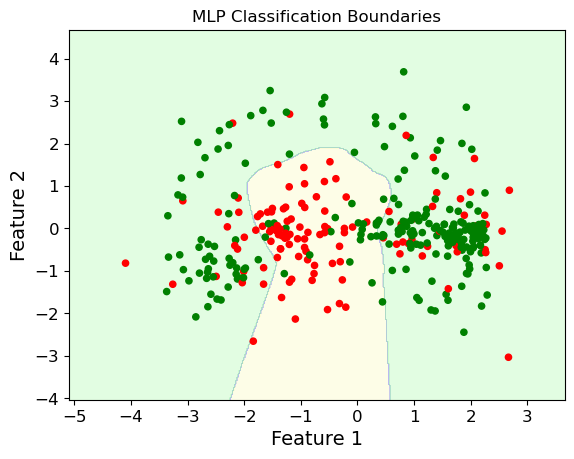

In [290]:
# data (as pandas dataframes) 
Xd = ionosphere.data.features 
yd = ionosphere.data.targets 

Xd = Xd.astype('float32')
Xd.drop(columns=['Attribute2'], inplace=True)

yd = LabelEncoder().fit_transform(yd)

pca = PCA(n_components=2)
Xd =pca.fit_transform(Xd)
# 生成一个二维分类数据集
#X, y = 

# 划分训练集和测试集
X_traind, X_testd, y_traind, y_testd = train_test_split(Xd, yd, test_size=0.2, random_state=42，,shuffle=True)

# 标准化特征
scaler = StandardScaler()
X_traind = scaler.fit_transform(X_traind)
X_testd = scaler.transform(X_testd)

# 构建MLP模型
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])  #metrics=acc==>train acc:80%左右

# 训练模型
history=model.fit(X_traind, y_traind, epochs=30, batch_size=32, validation_split=0.2)#,callbacks=[History()])

# 绘制决策边界
x_min, x_max = Xd[:, 0].min() - 1, Xd[:, 0].max() + 1
y_min, y_max = Xd[:, 1].min() - 1, Xd[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 预测网格点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.7).astype(int).reshape(xx.shape)    #0.5, 0.7 都是80%左右，但0.7fit得更好

# 绘制分类区域
print('train acc/AUC by case: ',history.history['AUC'][-1])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0']))
plt.scatter(Xd[:, 0], Xd[:, 1], color=['green' if label else 'red' for label in yd], s=20, cmap='RdBu') # edgecolor='k'
plt.title('MLP Classification Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

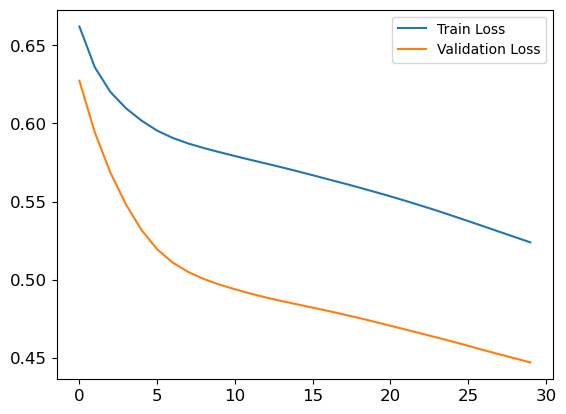

In [54]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

5982/5982 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


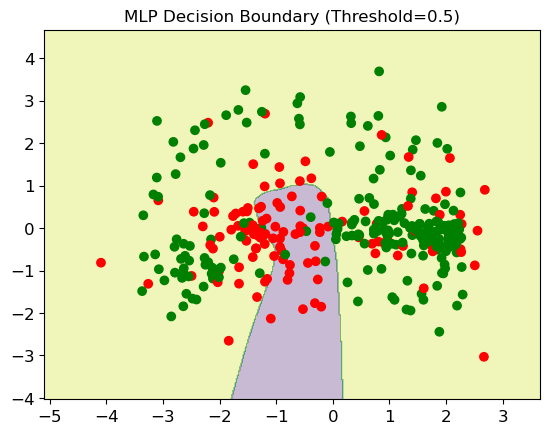

5982/5982 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


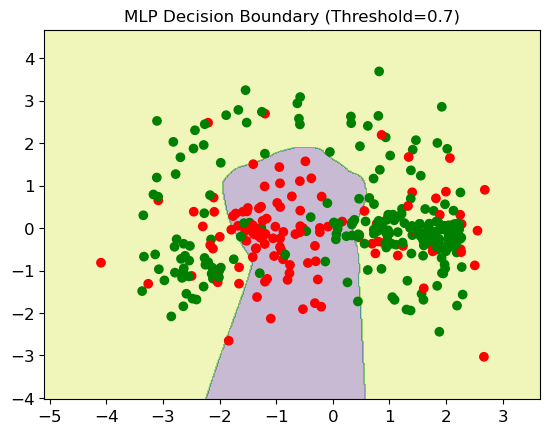

5982/5982 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


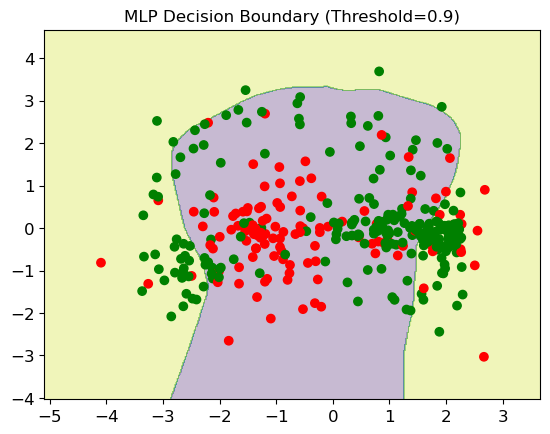

In [292]:
for threshold in [0.5, 0.7, 0.9]:
    Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > threshold).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(Xd[:, 0], Xd[:, 1], color=['green' if label else 'red' for label in yd], cmap='RdBu')
    plt.title(f"MLP Decision Boundary (Threshold={threshold})")
    plt.show()


comparing different thresholds（0.5 vs 0.7 vs 0.9); 0.7 is the better chioce

In [120]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,261 (126.02 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,508 (84.02 KB)

## TSNE

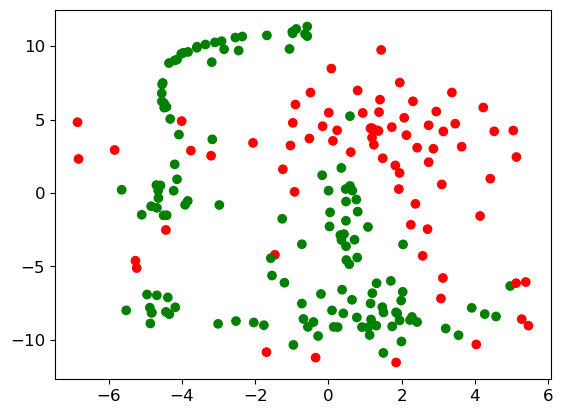

In [35]:
#reduce dimentions of data for visualization 
from sklearn.manifold import TSNE
np.random.seed(25)
x_embedded1 = TSNE(n_components=2).fit_transform(X_train)    #X_train_sclaed??为啥进来就图错？
plt.scatter(x_embedded1[:, 0], x_embedded1[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

val acc: 0.8001207729468599


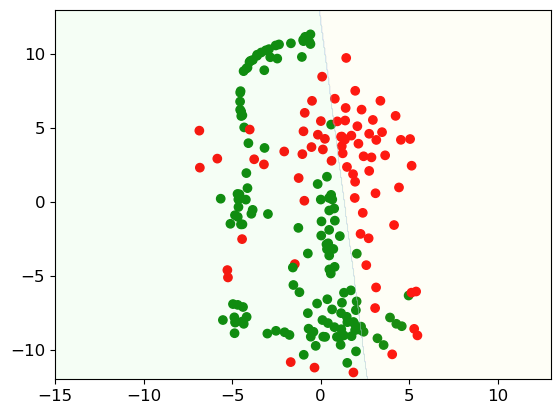

In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000,tol=1e-3,random_state=25)
sgd_clf.fit(x_embedded1,y_train)

x0, x1 = np.meshgrid(
        np.linspace(-15, 13, 500).reshape(-1, 1),
        np.linspace(-12, 13, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_predict = sgd_clf.predict(X_new)


zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.scatter(x_embedded1[:, 0], x_embedded1[:, 1], color=['green' if label else 'red' for label in y_train])
plt.contourf(x0, x1, zz, cmap=custom_cmap,alpha=0.1)
print('val acc:',np.average(cross_val_score(sgd_clf,X_val_scaled,y_val,scoring = 'accuracy',cv=3)))

# Modeling
4. Explore different models and shortlist the best ones. 

In [17]:
base_models={'LogisticRegression':LogisticRegression(solver="lbfgs", C=10),
        'DecisionTree': DecisionTreeClassifier(max_depth=10),
        'Random_forest': RandomForestClassifier(n_estimators=70,max_depth=8),
        'K-Nearest': KNeighborsClassifier(n_neighbors=3),
        'Gaussian': GaussianNB(),
        'SVM': SVC(gamma='scale'),
        'Xgboost': XGBClassifier(max_depth=8),
        'Adaboost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,min_samples_split=10),n_estimators=100)
       ,'SDG':SGDClassifier()}

LogisticRegression=LogisticRegression()
DecisionTree=DecisionTreeClassifier(max_depth=10)
Random_forest=RandomForestClassifier(n_estimators=70,max_depth=4)
K_Nearest=KNeighborsClassifier(n_neighbors=3)
Gaussian=GaussianNB()
SVM=SVC(gamma='scale')
Xgboost=XGBClassifier()
Adaboost=AdaBoostClassifier()
sgd_clf=SGDClassifier()

In [19]:
val_score={}
train_score={}

for name,model in base_models.items():
    model.fit(X_train_scaled,y_train)
    train_score[name]=model.score(X_train_scaled,y_train)
    val_score[name]=model.score(X_val_scaled,y_val)  

d=pd.DataFrame(train_score,index=['Train accuracy']).transpose()
d['Validation accuracy']=val_score.values()
d['Difference']=d['Validation accuracy']-d['Train accuracy'] 
d

,Train accuracy,Validation accuracy,Difference
LogisticRegression,0.985714,0.771429,-0.214286
DecisionTree,1.000000,0.814286,-0.185714
Random_forest,1.000000,0.857143,-0.142857
K-Nearest,0.909524,0.714286,-0.195238
Gaussian,0.928571,0.885714,-0.042857
SVM,0.980952,0.857143,-0.123810
Xgboost,1.000000,0.842857,-0.157143
Adaboost,1.000000,0.857143,-0.142857
SDG,0.971429,0.728571,-0.242857


<Axes: >

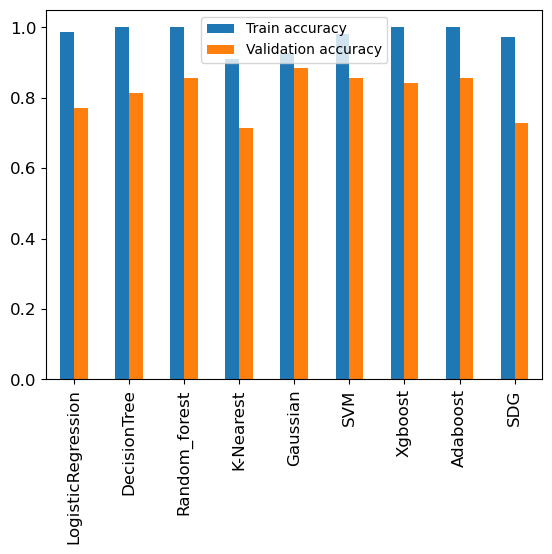

In [21]:
d.iloc[:,:2].plot.bar()

## Random Forest Classifier

In [859]:
from supertree import SuperTree
st = SuperTree(Random_forest, X_train, y_train, list(X.columns), list(set(data.Class)))
st.show_tree(which_tree=0)

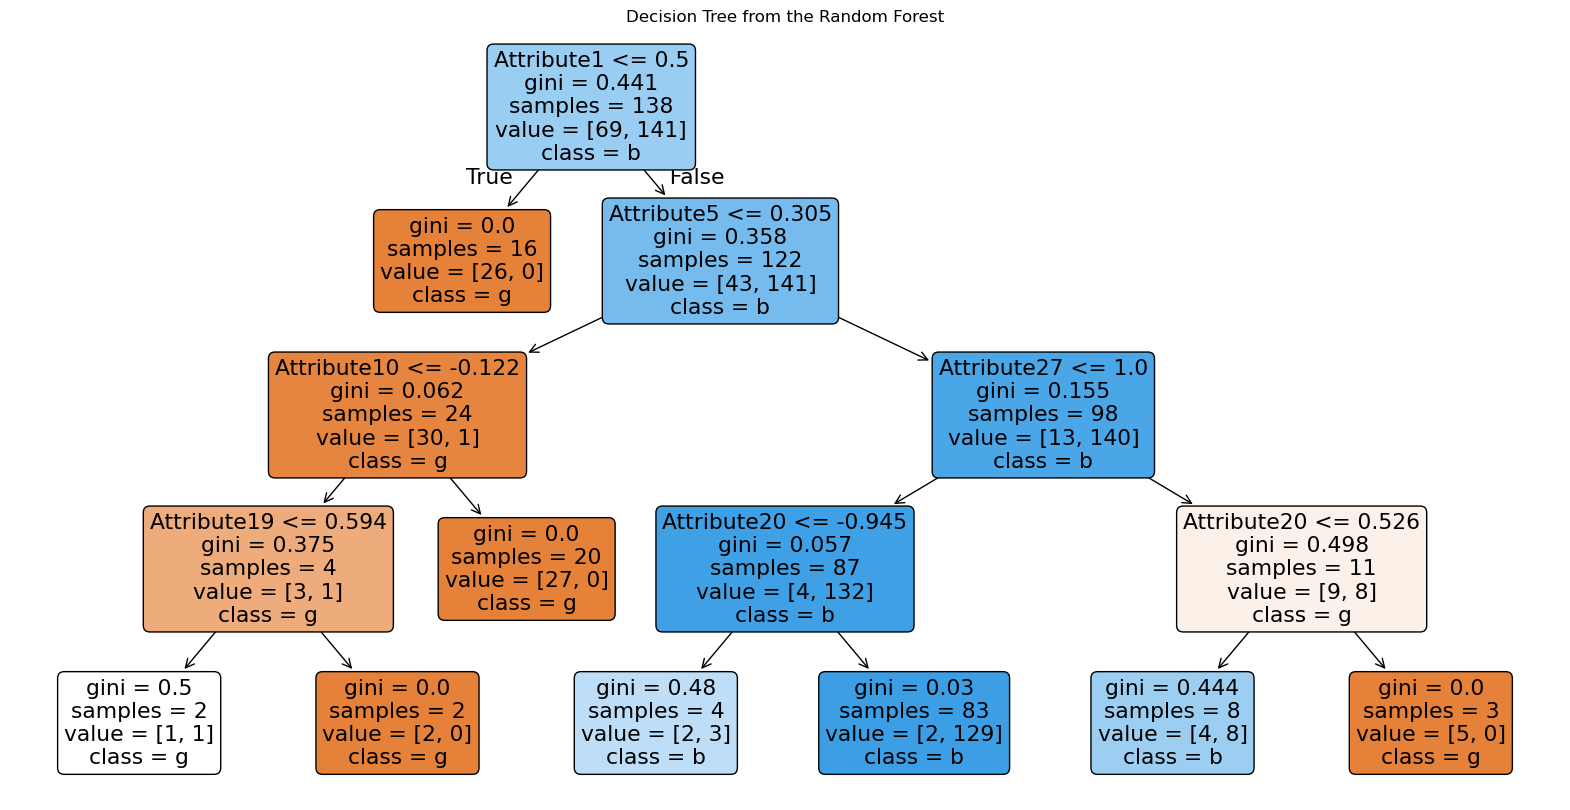

In [147]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(Random_forest.estimators_[0], 
          feature_names=list(X.columns),  
          class_names=data.Class,  
          filled=True,             
          rounded=True)            
plt.title("Decision Tree from the Random Forest")
plt.show()

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(10,71,5)}

grid_search = GridSearchCV(estimator = RandomForestClassifier(max_depth=4) # min_samples_leaf=20 min_samples_split=100
                           ,param_grid=param_grid, scoring='roc_auc',cv=5,verbose=1)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best parameters: {'n_estimators': 70}
Best cross-validation score: 0.99


In [167]:
from sklearn.model_selection import cross_val_predict

y_val_pred = cross_val_predict(best_rf,X_val,y_val,cv=3)

In [169]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,roc_auc_score,accuracy_score
conf_mx=confusion_matrix(y_val,y_val_pred)
print('Validation F1 score: ',f1_score(y_val,y_val_pred))
print('Validation AUC_score: ',roc_auc_score(y_val,best_rf.predict_proba(X_val)[:,1]))
conf_mx

Validation F1 score:  0.8837209302325582
Validation AUC_score:  0.9259882253994954


array([[22,  7],
       [ 3, 38]], dtype=int64)

In [171]:
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)
print('Test F1 score: ',f1_score(y_test,y_test_pred))
print('Test AUC_score: ',roc_auc_score(y_test,best_rf.predict_proba(X_test)[:,1]))

Test Accuracy: 0.9436619718309859
Test F1 score:  0.9607843137254902
Test AUC_score:  0.9703153988868275


## Neural Network - Binary Cross Entropy 

In [35]:

def build_shallow_model():
    
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(33,)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

def build_deep_model():
    
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(33,),
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

def build_wide_model():
    
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(33,)),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


=== 正在训练 Shallow 网络 ===

=== 正在训练 Deep 网络 ===

=== 正在训练 Wide 网络 ===


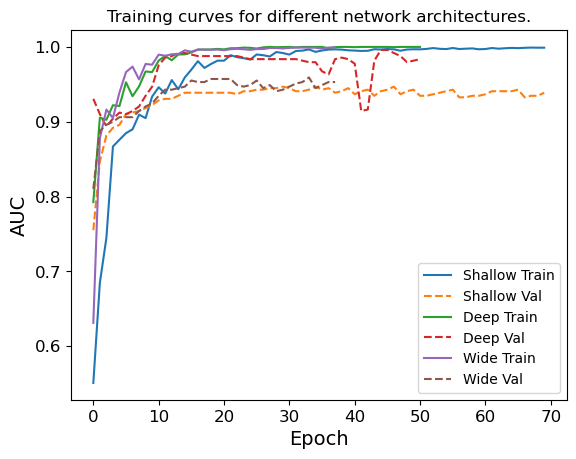


=== 网络结构对比 ===
Deep网络 | 最佳验证AUC: 0.9959
Wide网络 | 最佳验证AUC: 0.9592
Shallow网络 | 最佳验证AUC: 0.9469


In [37]:

models_dict = {
    'Shallow': build_shallow_model(),
    'Deep': build_deep_model(),
    'Wide': build_wide_model()
}


results = []
for name, model in models_dict.items():
    print(f"\n=== 正在训练 {name} 网络 ===")
    history = model.fit(X_train_scaled, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=0,
                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

    
    best_auc = max(history.history['val_auc'])
    results.append((name, best_auc))

    
    plt.plot(history.history['auc'], label=f'{name} Train')
    plt.plot(history.history['val_auc'], '--', label=f'{name} Val')

plt.title('Training curves for different network architectures.')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 打印结构对比结果
print("\n=== 网络结构对比 ===")
for name, auc in sorted(results, key=lambda x: -x[1]):
    print(f"{name}网络 | 最佳验证AUC: {auc:.4f}")


In [43]:
# Evaluate test accuracy and test AUC
for name, model in models_dict.items():
    print(f"\n=== Evaluating {name} Model on Test Set ===")
    
    # Predict class labels for accuracy
    y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Predict probabilities for AUC
    y_test_prob = model.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_test_prob)

    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print results
    print(f"{name} Model - Test Accuracy: {test_accuracy:.3f}")
    print(f"{name} Model - Test AUC: {test_auc:.3f}")
    print(f"{name} Model - Test F1: {test_f1:.3f}")


=== Evaluating Shallow Model on Test Set ===
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Shallow Model - Test Accuracy: 0.873
Shallow Model - Test AUC: 0.947
Shallow Model - Test F1: 0.914

=== Evaluating Deep Model on Test Set ===
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Deep Model - Test Accuracy: 0.901
Deep Model - Test AUC: 0.947
Deep Model - Test F1: 0.932

=== Evaluating Wide Model on Test Set ===
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Wide Model - Test Accuracy: 0.901
Wide Model - Test AUC: 0.955
Wide Model - Test F1: 0.932


In [92]:
# Neural Network
np.random.seed(25)
tf.random.set_seed(25)

n_features = X_train_scaled.shape[1]

model_1 = Sequential()
#1st hidden layer with 10 nodes, taking 33 features as input
model_1.add(Dense(10, activation='relu', input_shape=(n_features,)))

#2nd hidden layer with 8 nodes
model_1.add(Dense(8, activation='relu'))

#model.add(Dropout(0.1))
#model.add(Dense(8, activation='relu'))

#output layer with 1 node(neuron)
model_1.add(Dense(1, activation='sigmoid'))  

# compile the model
model_1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model_1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val),verbose=0) 


# Evaluate the performance of the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8518 - loss: 0.5919
Val Loss: 0.6165246367454529, Val Accuracy: 0.8285714387893677


train acc:  0.9952380657196045


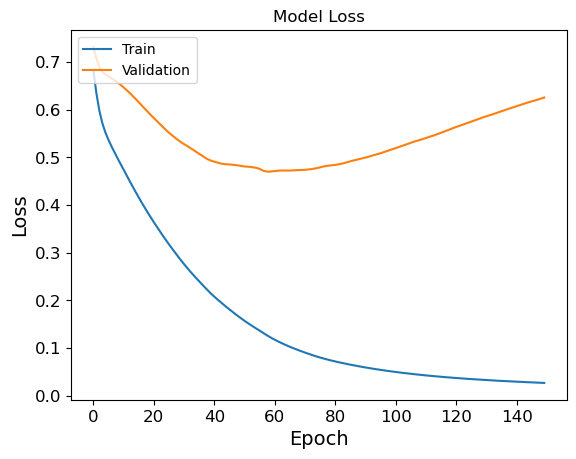

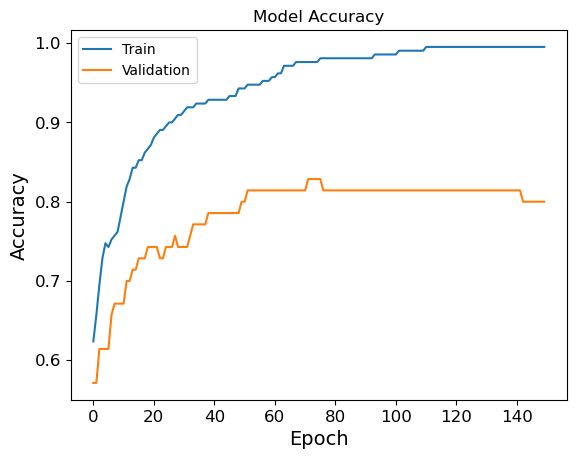

In [190]:
print('train acc: ',history.history['accuracy'][-1])

#  Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [220]:
loss, acc = model_1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.887


In [228]:

y_p_1 = model_1.predict(X_test)


y_p_1_labels = (y_p_1 >= 0.7).astype(int)


df_1 = pd.DataFrame(y_p_1_labels, columns=['predicted'])
df_1['real'] = y_test
df_1['difference'] = (df_1['real'] == df_1['predicted'])
manual_accuracy = df_1['difference'].sum() / len(df_1)
print('Manual Test Accuracy (Threshold=0.7):', manual_accuracy)


print(df_1[df_1['difference'] == False])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Manual Test Accuracy (Threshold=0.7): 0.8873239436619719
    predicted  real  difference
0           1     0       False
8           0     1       False
28          1     0       False
33          1     0       False
53          0     1       False
56          0     1       False
59          1     0       False
66          1     0       False


In [232]:
confusion_matrix(y_test, y_p_1_labels)  

array([[17,  5],
       [ 3, 46]], dtype=int64)

In [234]:
from sklearn.metrics import classification_report

classification_report(y_test, y_p_1_labels, output_dict=True)

{'0': {'precision': 0.85,
  'recall': 0.7727272727272727,
  'f1-score': 0.8095238095238095,
  'support': 22.0},
 '1': {'precision': 0.9019607843137255,
  'recall': 0.9387755102040817,
  'f1-score': 0.92,
  'support': 49.0},
 'accuracy': 0.8873239436619719,
 'macro avg': {'precision': 0.8759803921568627,
  'recall': 0.8557513914656771,
  'f1-score': 0.8647619047619048,
  'support': 71.0},
 'weighted avg': {'precision': 0.8858602595967964,
  'recall': 0.8873239436619719,
  'f1-score': 0.8857679409792086,
  'support': 71.0}}

In [236]:

model_2 = Sequential()
#1st hidden layer with 10 nodes, taking 33 features as input
model_2.add(Dense(10, activation='relu', input_shape=(n_features,),kernel_regularizer=l2(0.01)))

model_2.add(Dropout(0.2))  # adding Dropout

#2nd hidden layer with 8 nodes
model_2.add(Dense(8, activation='relu',kernel_regularizer=l2(0.01)))

model_2.add(Dropout(0.2)) 

#output layer with 1 node(neuron)
model_2.add(Dense(1, activation='sigmoid'))  

# compile the model
model_2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#Add early-stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# fit the model
history_2 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val),verbose=0,callbacks=[early_stop]) 


# Evaluate the performance of the model on the validation set
val_loss, val_accuracy = model_2.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8290 - loss: 0.5349
Val Loss: 0.5600571632385254, Val Accuracy: 0.8142856955528259


train acc:  0.9523809552192688


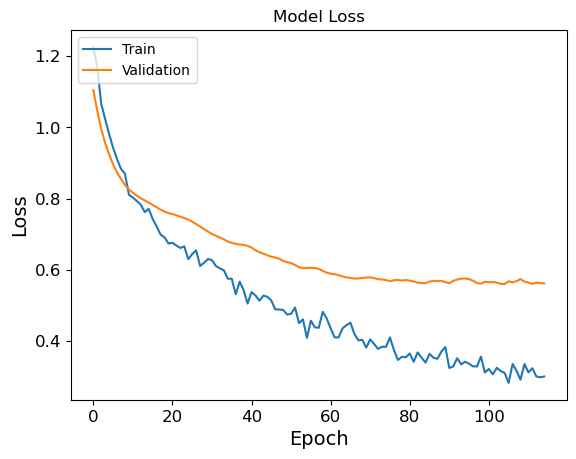

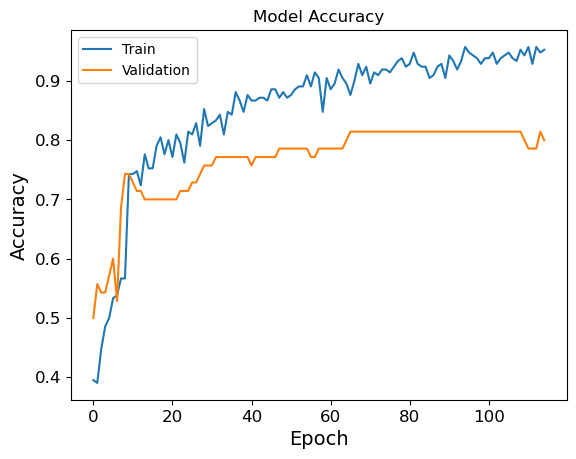

In [238]:
print('train acc: ',history_2.history['accuracy'][-1])

#  Plot the training and validation loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [244]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

y_p= model.predict(X_test)
y_p=np.array([(p>=0.7)*1 for p in y_p])   #setting threshold as 0.7
df=pd.DataFrame(y_p)
df['real']=y_test
df['difference']=(df['real']==df[0])
print('test acc:',df['difference'].sum()/len(df))
df[df['difference']==False]   

Test Accuracy: 0.845
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
test acc: 0.9154929577464789


,0,real,difference
0,1,0,False
4,0,1,False
8,0,1,False
28,1,0,False
59,1,0,False
66,1,0,False


In [248]:
confusion_matrix(y_test, y_p)  #6 wrong cases

array([[18,  4],
       [ 2, 47]], dtype=int64)

In [33]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.metrics import AUC


model_2_ft = Sequential()

model_2_ft.add(Dense(12, kernel_regularizer=l2(0.001), use_bias=False))
model_2_ft.add(BatchNormalization())
model_2_ft.add(Activation('relu'))
model_2_ft.add(Dropout(0.3))


model_2_ft.add(Dense(12, kernel_regularizer=l2(0.001), use_bias=False))
model_2_ft.add(BatchNormalization())
model_2_ft.add(Activation('relu'))
model_2_ft.add(Dropout(0.3))


model_2_ft.add(Dense(1, activation='sigmoid'))


lr_schedule = CosineDecay(initial_learning_rate=1e-3, decay_steps=1000)
model_2_ft.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}


early_stop = EarlyStopping(monitor='val_auc', patience=15, mode='max', restore_best_weights=True)


history_2 = model_2_ft.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    verbose=0,
    callbacks=[early_stop],
    class_weight=class_weights
)

# 评估
val_loss, val_acc, val_auc = model_2_ft.evaluate(X_val_scaled, y_val)
print(f"Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.3f}, Val AUC: {val_auc:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7835 - auc: 0.8925 - loss: 0.4561
Val Loss: 0.448, Val Acc: 0.786, Val AUC: 0.906


In [37]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Predict class labels (binary: 0 or 1) for accuracy and F1 score
y_test_pred = (model_2_ft.predict(X_test_scaled) > 0.5).astype("int32")

# Predict probabilities for AUC
y_test_prob = model_2_ft.predict(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# F1 Score
test_f1 = f1_score(y_test, y_test_pred)

# AUC Score
test_auc = roc_auc_score(y_test, y_test_prob)

# Print Results
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test AUC Score: {test_auc:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Accuracy: 0.859
Test F1 Score: 0.896
Test AUC Score: 0.887


# Fine-tuning  


### best_model_nerual_network

In [65]:

def build_tuned_model(hp):
    
    model = models.Sequential()
    model.add(layers.Input(shape=(33,)))

    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', 32, 128, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh']),
            kernel_regularizer=regularizers.l2(0.01)
        ))
        model.add(layers.Dropout(
            hp.Float('dropout', 0.1, 0.5))
        )

    model.add(layers.Dense(1, activation='sigmoid'))

    
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss='binary_crossentropy',
        metrics=['auc']
    )
    return model


tuner = kt.RandomSearch(
    build_tuned_model,
    objective='val_auc',
    max_trials=15,
    executions_per_trial=2,
    directory='tuning',
    project_name='ionosphere'
)


print("\n=== 开始超参数搜索 ===")
tuner.search(X_train_scaled, y_train,
            epochs=50,
            validation_split=0.2,
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters()[0]

Reloading Tuner from tuning\ionosphere\tuner0.json

=== 开始超参数搜索 ===


In [67]:

print("Best hyperparameters:")
for param in best_hp.values.keys():
    print(f"{param}: {best_hp.get(param)}")


Best hyperparameters:
num_layers: 3
units_0: 96
activation: relu
dropout: 0.306692170053881
learning_rate: 0.01
units_1: 32
units_2: 64


In [69]:
from sklearn.metrics import f1_score,accuracy_score
# Predict labels and probabilities
y_test_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
y_test_prob = best_model.predict(X_test_scaled)

# Calculate F1 Score and AUC
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test AUC Score: {test_auc:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test F1 Score: 0.931
Test AUC Score: 0.984
Test Accuracy: 0.901


### enhanced_best_model_nn

In [115]:
import keras_tuner as kt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_enhanced_model(hp):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(33,)))
    
    
    num_layers = hp.Int('num_layers', 3, 5)  
    for i in range(num_layers):
        model.add(Dense(
            units=hp.Int(f'units_{i}', 32, 128, step=32), 
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh']),  
            kernel_regularizer=regularizers.l2(0.01)  
        ))
        model.add(Dropout(
            hp.Float('dropout', 0.1, 0.5, step=0.1)  
        ))
    
    
    model.add(Dense(1, activation='sigmoid'))
    

    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]) 
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy','auc'] #'accuracy', tf.keras.metrics.AUC(name='auc')
    )
    return model


enhanced_tuner = kt.RandomSearch(
    build_enhanced_model,
    objective=kt.Objective('val_auc', direction='max'),  
    max_trials=20,
    executions_per_trial=2,
    directory='enhanced_tuning',
    project_name='ionosphere',
    overwrite=True
)


print("\n=== 启动增强版超参数搜索 ===")
enhanced_tuner.search(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=10,
            mode='max',
            restore_best_weights=True
        )
    ],
    verbose=1
)


enhanced_best_model_nn = enhanced_tuner.get_best_models()[0]
enhanced_best_hp_nn = enhanced_tuner.get_best_hyperparameters()[0]

Trial 20 Complete [00h 00m 16s]
val_auc: 0.9969387650489807

Best val_auc So Far: 0.9969387650489807
Total elapsed time: 00h 06m 06s


In [259]:
enhanced_best_model_nn.summary()


print("Best hyperparameters:")
for param in enhanced_best_hp_nn.values.keys():
    print(f"{param}: {enhanced_best_hp_nn.get(param)}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,861 (257.27 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,908 (171.52 KB)

Best hyperparameters:
num_layers: 5
units_0: 32
activation_0: relu
dropout: 0.4
units_1: 128
activation_1: relu
units_2: 64
activation_2: relu
learning_rate: 0.01
units_3: 64
activation_3: relu
units_4: 64
activation_4: tanh


In [117]:
from sklearn.metrics import f1_score,accuracy_score
# Predict labels and probabilities
y_test_pred = (enhanced_best_model_nn.predict(X_test_scaled) > 0.5).astype("int32")
y_test_prob = enhanced_best_model_nn.predict(X_test_scaled)

# Calculate F1 Score and AUC
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test AUC Score: {test_auc:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test F1 Score: 0.960
Test AUC Score: 0.986
Test Accuracy: 0.944


In [125]:
#尝试数据
row = X_val_scaled[1:2].values.reshape(1,33)
enhanced_best_model_nn.predict([row])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9504151]], dtype=float32)

In [226]:
y_val[1:2]

array([1])

###   xgboost--------------------------------------------------------

In [184]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1,0.5],
    'reg_lambda': [0, 0.1]
}


xgb = XGBClassifier(shuffle=True,random_state=25, eval_metric='logloss')


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)


grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',  
    cv=cv,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_scaled, y_train)


print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


In [186]:
best_params_clean = {k: v for k, v in grid_search.best_params_.items() 
                     if k not in ['eval_metric', 'early_stopping_rounds']}

In [188]:

X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=25
)


best_xgb_tuned = XGBClassifier(
    **best_params_clean, 
    eval_metric='logloss',
    early_stopping_rounds=10
)

best_xgb_tuned.fit(
    X_train_part, y_train_part,
    eval_set=[(X_val_part, y_val_part)], 
    #eval_metric="logloss",
    #early_stopping_rounds=10,
    verbose=True
)


best_n_estimators = best_xgb_tuned.best_iteration

[0]	validation_0-logloss:0.57989
[1]	validation_0-logloss:0.52152
[2]	validation_0-logloss:0.43225
[3]	validation_0-logloss:0.37542
[4]	validation_0-logloss:0.33173
[5]	validation_0-logloss:0.29594
[6]	validation_0-logloss:0.26675
[7]	validation_0-logloss:0.25264
[8]	validation_0-logloss:0.25194
[9]	validation_0-logloss:0.23772
[10]	validation_0-logloss:0.24342
[11]	validation_0-logloss:0.24391
[12]	validation_0-logloss:0.23679
[13]	validation_0-logloss:0.23506
[14]	validation_0-logloss:0.23890
[15]	validation_0-logloss:0.23943
[16]	validation_0-logloss:0.25092
[17]	validation_0-logloss:0.24324
[18]	validation_0-logloss:0.24660
[19]	validation_0-logloss:0.24338
[20]	validation_0-logloss:0.24690
[21]	validation_0-logloss:0.24528
[22]	validation_0-logloss:0.25536
[23]	validation_0-logloss:0.26026


In [190]:
y_pred = best_xgb_tuned.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test F1: {f1_score(y_test, y_pred):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, y_pred):.3f}")

Test Accuracy: 0.944
Test F1: 0.961
Test AUC: 0.909


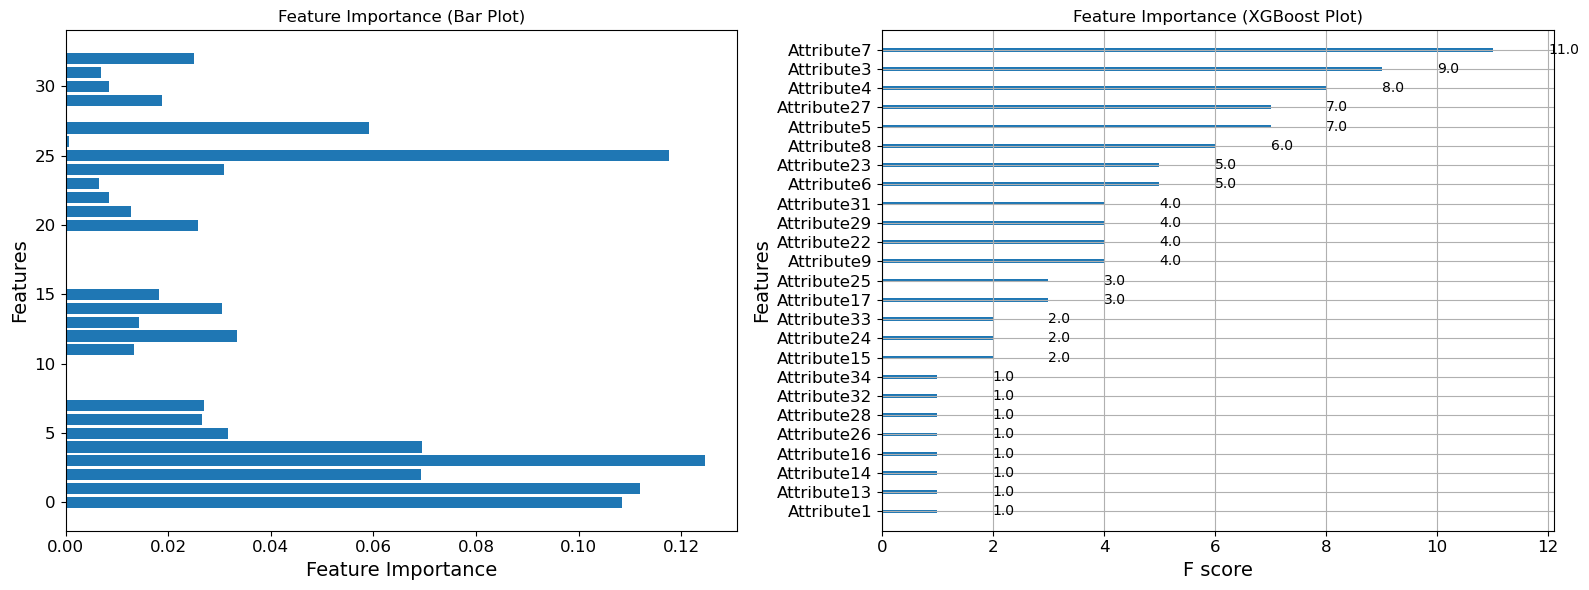

In [72]:
from xgboost import plot_importance

feature_importances = best_xgb_tuned.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].barh(range(len(feature_importances)), feature_importances)
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].set_title("Feature Importance (Bar Plot)")


plot_importance(best_xgb_tuned, importance_type="weight", ax=axes[1])  # 指定 ax 参数
axes[1].set_title("Feature Importance (XGBoost Plot)")


plt.tight_layout()
plt.show()


# Summary
6. Present your final solution with any summary conclusions.


In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression


# initial train set → base train set (60%) + meta train set (20%) + val set (20%)
X_train_full, X_meta_train, y_train_full, y_meta_train = train_test_split(
    X_train_scaled, y_train, 
    test_size=0.2, 
    stratify=y_train,
    random_state=25
)


X_base_train, X_holdout, y_base_train, y_holdout = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=25
)

meta_base_models = {
    'NN': enhanced_best_model_nn,
    'XGB': best_xgb_tuned,
    'RF': best_rf
}


n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=25)
meta_features_train = np.zeros((X_meta_train.shape[0], len(meta_base_models)))
meta_features_test = np.zeros((X_test_scaled.shape[0], len(meta_base_models))) 

for model_idx, (model_name, model) in enumerate(meta_base_models.items()):
    print(f"\n=== 训练基模型: {model_name} ===")
    
    
    meta_predictions = np.zeros(X_meta_train.shape[0])
    
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_base_train, y_base_train)):
        X_train_fold, X_val_fold = X_base_train.iloc[train_idx], X_base_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_base_train[train_idx], y_base_train[val_idx]
        
        
        cloned_model = clone(model) if model_name != 'NN' else enhanced_best_model_nn
        
        
        if model_name == 'XGB':
            cloned_model.fit(
                X_train_fold, y_train_fold,
                eval_set=[(X_val_fold, y_val_fold)],
                verbose=0
            )
        elif model_name == 'NN':
            cloned_model.fit(
                X_train_fold, y_train_fold,
                epochs=100,
                batch_size=32,
                validation_split=0.2,
                verbose=0
            )
        else:
            cloned_model.fit(X_train_fold, y_train_fold)
        
        )
        if model_name == 'NN':
            fold_pred = cloned_model.predict(X_meta_train).flatten()
        else:
            fold_pred = cloned_model.predict_proba(X_meta_train)[:, 1]
        
        
        meta_predictions += fold_pred / n_folds
    
    
    meta_features_train[:, model_idx] = meta_predictions
    #meta_features_test[:, model_idx] = test_predictions.mean(axis=1)
    
    
    print(f"重新训练最终{model_name}...")
    
    if model_name == 'XGB':
        
        model.fit(
            X_train_full, y_train_full,
            eval_set=[(X_holdout, y_holdout)],
            verbose=0
        )
    elif model_name == 'NN':
        model.fit(
            X_train_full, y_train_full,
            epochs=100,
            batch_size=32,
            verbose=0
        )
    else:
        model.fit(X_train_full, y_train_full)
    
    
    if model_name == 'NN':
        meta_features_test[:, model_idx] = model.predict(X_test_scaled).flatten()
    else:
        meta_features_test[:, model_idx] = model.predict_proba(X_test_scaled)[:, 1]


from sklearn.ensemble import GradientBoostingClassifier

blender = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=25
)
blender.fit(meta_features_train, y_meta_train)


from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

def evaluate_model(name, model, X, y):
    
    if name == 'NN':
        y_proba = model.predict(X).flatten()
        y_pred = (y_proba > 0.5).astype(int)
    else:
        y_proba = model.predict_proba(X)[:, 1]
        y_pred = model.predict(X)
    
    return {
        'AUC': roc_auc_score(y, y_proba),
        'Accuracy': accuracy_score(y, y_pred),
        'F1': f1_score(y, y_pred, average='binary')
    }


print("\n=== 基模型独立性能 ===")
base_results = {} 

for name, model in meta_base_models.items():
    scores = evaluate_model(name, model, X_test_scaled, y_test)
    base_results[name] = scores  
    print(f"{name}:")
    print(f"  AUC: {scores['AUC']:.4f}")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  F1: {scores['F1']:.4f}")


blend_proba = blender.predict_proba(meta_features_test)[:, 1]
blend_pred = (blend_proba > 0.5).astype(int)
blend_auc = roc_auc_score(y_test, blend_proba)
blend_acc = accuracy_score(y_test, blend_pred)
blend_f1 = f1_score(y_test, blend_pred, average='binary')

print(f"\n=== Blending集成性能 ===")
print(f"AUC: {blend_auc:.4f}")
print(f"Accuracy: {blend_acc:.4f}")
print(f"F1: {blend_f1:.4f}")


import pandas as pd


results = []
for name in meta_base_models.keys():
    results.append({
        'Model': name,
        'AUC': base_results[name]['AUC'],
        'Accuracy': base_results[name]['Accuracy'],
        'F1': base_results[name]['F1']
    })
results.append({
    'Model': 'Blending',
    'AUC': blend_auc,
    'Accuracy': blend_acc,
    'F1': blend_f1
})

df_results = pd.DataFrame(results).sort_values('AUC', ascending=False)
print("\n模型对比:")
print(df_results.to_string(index=False))


=== 训练基模型: NN ===
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
重新训练最终NN...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== 训练基模型: XGB ===
重新训练最终XGB...

=== 训练基模型: RF ===
重新训练最终RF...

=== 基模型独立性能 ===
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
NN:
  AUC: 0.9494
  Accuracy: 0.9155
  F1: 0.9400
XGB:
  AUC: 0.9063
  Accuracy: 0.9014
  F1: 0.9293
RF:
  AUC: 0.9666
  Accuracy: 0.9437
  F1: 0.9600

=== Blending集成性能 ===
AUC: 0.9337
Accuracy: 0.9296
F1: 0.9515

模型对比:
   Model      AUC  Accuracy       F1
      RF 0.966605  0.943662 0.960000
      NN 0.949443  0.915493 0.940000
Blending 0.933673  0.929577 0.951456
     XGB 0.906308  0.901408 0.929293
